In [60]:
import os
import requests
import pandas as pd
from urllib.parse import urljoin
import requests
from bs4 import BeautifulSoup
from vnstock3 import Vnstock
from vnstock3.explorer.misc.gold_price import *
from vnstock3.explorer.misc.exchange_rate import *
from vnstock3.botbuilder.noti import Messenger
from datetime import datetime,timedelta,date
import matplotlib.pyplot as plt

In [34]:
btmc_goldprice()

,name,karat,gold_content,buy_price,sell_price,world_price,time
6,VÀNG MIẾNG SJC (Vàng SJC),24k,999.9,8030000,8350000,0,17/11/2024 08:59
0,VÀNG MIẾNG VRTL (Vàng Rồng Thăng Long),24k,999.9,8103000,8268000,0,17/11/2024 08:59
1,QUÀ MỪNG BẢN VỊ VÀNG (Quà Mừng Bản Vị Vàng),24k,999.9,8103000,8268000,0,17/11/2024 08:59
2,NHẪN TRÒN TRƠN (Vàng Rồng Thăng Long),24k,999.9,8103000,8268000,0,17/11/2024 08:59
4,TRANG SỨC BẰNG VÀNG RỒNG THĂNG LONG 999.9 (Vàn...,24k,999.9,8040000,8260000,0,17/11/2024 08:59
5,TRANG SỨC BẰNG VÀNG RỒNG THĂNG LONG 99.9 (Vàng...,24k,99.9,8030000,8250000,0,17/11/2024 08:59
3,VÀNG NGUYÊN LIỆU (Vàng thị trường),24k,999.9,7980000,0,0,17/11/2024 08:59


In [59]:
date = datetime.today().strftime('%Y-%m-%d')
df = vcb_exchange_rate(date=date)
df['buy _cash'] = df['buy _cash'].replace('-', '0').str.replace(',', '').astype(float)
df = df[df['buy _cash'] != 0]
df['sell'] = df['sell'].str.replace(',', '').astype(float)
df['exchange_rate'] = (df['buy _cash'] + df['sell'])/2
df

,currency_code,currency_name,buy _cash,buy _transfer,sell,date,exchange_rate
2,AUD,AUSTRALIAN DOLLAR,15965.78,"16,127.05",16644.42,2024-11-17,16305.100
3,CAD,CANADIAN DOLLAR,17607.85,"17,785.71",18356.29,2024-11-17,17982.070
4,CHF,SWISS FRANC,27830.10,"28,111.22",29013.05,2024-11-17,28421.575
5,CNY,CHINESE YUAN,3425.24,"3,459.84",3570.83,2024-11-17,3498.035
7,EUR,EURO,26070.92,"26,334.26",27500.42,2024-11-17,26785.670
8,GBP,UK POUND STERLING,31340.05,"31,656.61",32672.19,2024-11-17,32006.120
9,HKD,HONG KONG DOLLAR,3180.68,"3,212.80",3315.87,2024-11-17,3248.275
11,JPY,JAPANESE YEN,156.74,158.32,165.85,2024-11-17,161.295
12,KRW,KOREAN WON,15.62,17.36,18.84,2024-11-17,17.230
19,SGD,SINGAPORE DOLLAR,18402.38,"18,588.26",19184.59,2024-11-17,18793.485


In [24]:
def MFI(stock, start_date, end_date):
    stock = Vnstock().stock(symbol = stock, source = 'VCI')
    df = stock.quote.history(
                            start = start_date, 
                            end = end_date,
                            interval= '1D' 
                            )
    df['Typical Price'] = (df['high'] + df['low'] + df['close'])/3
    df['Money Flow Type'] = ''
    for i in range(0, len(df)-1):
        j = i + 1
        if df.iloc[j, df.columns.get_loc('Typical Price')] >= df.iloc[i, df.columns.get_loc('Typical Price')]:
            df.iloc[j, df.columns.get_loc('Money Flow Type')] = 'P'
        if df.iloc[j, df.columns.get_loc('Typical Price')] < df.iloc[i, df.columns.get_loc('Typical Price')]:
            df.iloc[j, df.columns.get_loc('Money Flow Type')] = 'N'
    df = df[1:]
    df.reset_index(inplace=True)
    negav = df.loc[df['Money Flow Type'] == 'N', 'Typical Price'].sum()
    Posi = df.loc[df['Money Flow Type'] == 'P', 'Typical Price'].sum()
    money_ratio = Posi/negav
    MFI = 100 - 100/(1+money_ratio)
    return {'mfi': MFI, 'data' : df}

2024-11-17 17:46:18 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:21 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:24 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:28 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:35 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:38 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:41 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-11-17 17:46:44 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất 

    index       time   open   high    low  close   volume  Typical Price  \
0       1 2024-10-29  41.50  41.70  41.30  41.35  1285000      41.450000   
1       2 2024-10-30  41.45  41.70  40.80  41.00  2024200      41.166667   
2       3 2024-10-31  41.40  41.70  41.05  41.55  1827900      41.433333   
3       4 2024-11-01  41.55  41.60  41.10  41.20  1338600      41.300000   
4       5 2024-11-04  41.40  41.50  41.05  41.20  1345200      41.250000   
5       6 2024-11-05  41.20  41.30  41.05  41.30   963000      41.216667   
6       7 2024-11-06  41.50  42.00  41.40  41.80  1521600      41.733333   
7       8 2024-11-07  42.00  42.25  41.70  41.70  1172800      41.883333   
8       9 2024-11-08  41.80  41.80  41.00  41.05  2191200      41.283333   
9      10 2024-11-11  41.05  41.15  40.65  40.80  1944400      40.866667   
10     11 2024-11-12  41.00  41.50  40.50  40.55  2485900      40.850000   
11     12 2024-11-13  40.85  41.15  40.50  40.60  2043200      40.750000   
12     13 20

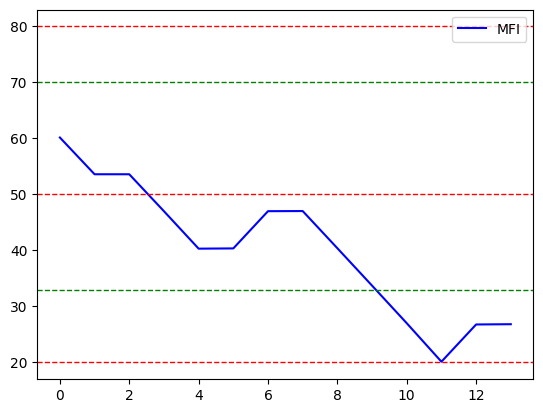

FileNotFoundError: [Errno 2] No such file or directory: 'f/media/kiendt/DATA/DE/ETL/PythonScraper/Python-Web-Scraping/data/{stock}.jpg'

<Figure size 640x480 with 0 Axes>

In [ ]:
stock = "VIC"
start = (datetime.today() - timedelta(days=21)).strftime('%Y-%m-%d')
end = datetime.today().strftime('%Y-%m-%d')
df = MFI(stock,start,end)['data']
base_list = df['time']
for i in base_list:
    start = (i - timedelta(days=21)).strftime('%Y-%m-%d')
    end = i.strftime('%Y-%m-%d')
    MFI_value = MFI(stock,start,end)['mfi']
    df.loc[df['time'] == i,'MFI'] = MFI_value
chart = df.plot(kind = 'line',y = 'MFI', color = 'blue')
print(df)
for y in [20, 50, 80]:
    chart.axhline(y=y, color='r', linestyle='--', linewidth=1)
for y in [70, 33]:
    chart.axhline(y=y, color='green', linestyle='--', linewidth=1)
plt.savefig(f'/media/kiendt/DATA/DE/ETL/PythonScraper/Python-Web-Scraping/data/{stock}.jpg')
noti = Messenger(platform='telegram', channel='-4593553985', token_key='8042244371:AAEYb80H0qa8ox1QFPrkrqqzsf6Li-aCRZU')
noti.send_message(message=f'{stock} information in {end}', file_path= f'/media/kiendt/DATA/DE/ETL/PythonScraper/Python-Web-Scraping/data/{stock}.jpg',title=f'MFI index in {end}')